In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('LoR-CCChurn.csv')

In [3]:
df.head()

,cust_id,Churn_Flag,Churn_Num,Average_Daily_Balance,Interest_Paid,Cash_Advances,Balance_Transferred,Marital_Status,Occupation_Group,Age_of_Account__Months,Age_Group,LTV_Group,Bill_Cycle,Customer_Type,Gender,Customer_Value,Credit_Limit
0,95454,Y,1,12300,16809.990,14212,7035.285,Married,Export,38,49,Very_Bad,4,SMCOA,M,11922.6375,6000
1,13800,N,0,25206,16803.975,7038,2529.275,Married,Others,70,.,Good,25,ORDRY,M,9666.6250,17000
2,18486,N,0,20163,16802.550,4449,1348.745,Married,Computers,.,.,Others,11,SMCOA,M,9075.6475,6000
3,137302,N,0,25203,16802.025,1317,626.130,Other,Other,30,.,Good,4,ORDRY,U,8714.0775,7000
4,179235,N,0,12294,16801.845,0,0.000,Other,Other,24,.,Good,4,ORDRY,U,8400.9225,2000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244057 entries, 0 to 244056
Data columns (total 17 columns):
cust_id                   244057 non-null int64
Churn_Flag                244057 non-null object
Churn_Num                 244057 non-null int64
Average_Daily_Balance     244057 non-null int64
Interest_Paid             244057 non-null float64
Cash_Advances             244057 non-null int64
Balance_Transferred       244057 non-null float64
Marital_Status            244057 non-null object
Occupation_Group          244057 non-null object
Age_of_Account__Months    244057 non-null object
Age_Group                 244057 non-null object
LTV_Group                 244057 non-null object
Bill_Cycle                244057 non-null int64
Customer_Type             244057 non-null object
Gender                    244057 non-null object
Customer_Value            244057 non-null float64
Credit_Limit              244057 non-null int64
dtypes: float64(3), int64(6), object(8)
memory usage: 31.7+

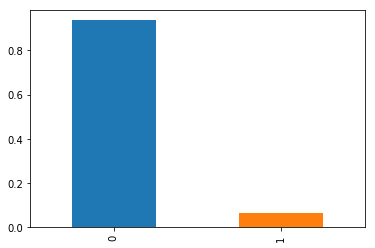

In [5]:
df['Churn_Num'].value_counts(normalize=True).plot(kind='bar')

In [6]:
df['Marital_Status'].value_counts()

Other        156860
Married       79989
Unmarried      7203
F                 3
N                 2
Name: Marital_Status, dtype: int64

In [17]:
#df = df.drop(df[df['Marital_Status']=='N'].index)

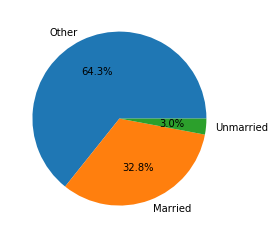

In [18]:
df['Marital_Status'] = df['Marital_Status'].replace(['F', 'N'], 'Other')

ms = df['Marital_Status'].value_counts()
msl = ms.index.tolist()

plt.pie(ms, labels=msl, autopct='%1.1f%%' )
plt.show()

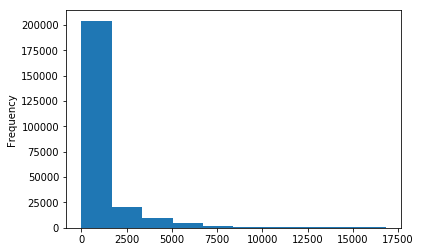

In [8]:
df['Interest_Paid'].plot(kind='hist')

### Bivariate Analysis

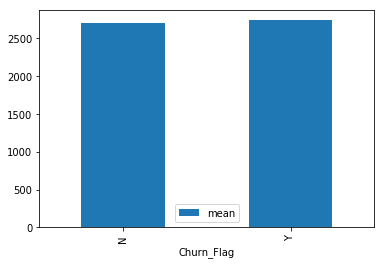

In [9]:
df['Average_Daily_Balance'].groupby(df['Churn_Flag']).agg(['mean']).plot(kind='bar')

In [10]:
df['Average_Daily_Balance'].describe()

count    244057.000000
mean       2701.699128
std        4172.483179
min           0.000000
25%         186.000000
50%         801.000000
75%        3369.000000
max       30975.000000
Name: Average_Daily_Balance, dtype: float64

In [11]:
def adb_cat(adb):
    if adb<= 200:
        return 1
    elif 200< adb <=800:
        return 2
    elif 800 <adb <=3500:
        return 3
    else:
        return 4   

In [12]:
df['adb_cat'] = df['Average_Daily_Balance'].map(adb_cat)
df['adb_cat'].value_counts()

1    63776
3    62593
4    59489
2    58199
Name: adb_cat, dtype: int64

In [13]:
df['Average_Daily_Balance'].groupby(df['adb_cat']).agg(['min', 'max'])

,min,max
adb_cat,,
1,0,198
2,201,798
3,801,3498
4,3501,30975


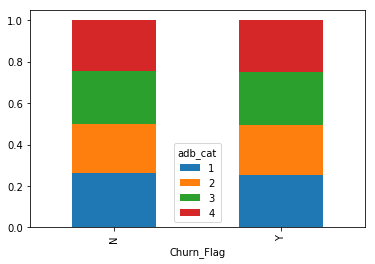

In [14]:
adb = pd.crosstab(df['Churn_Flag'], df['adb_cat'], normalize=0)
adb.plot(kind='bar', stacked=True)

In [15]:
df['Balance_Transferred'].describe()

count    244057.000000
mean       4079.215433
std        9668.325385
min           0.000000
25%           0.000000
50%         210.280000
75%        3250.470000
max      158310.610000
Name: Balance_Transferred, dtype: float64

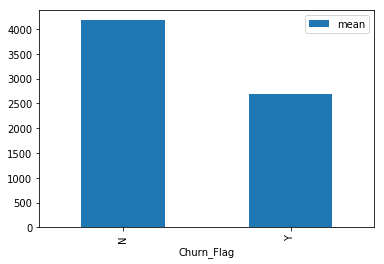

In [16]:
df['Balance_Transferred'].groupby(df['Churn_Flag']).agg(['mean']).plot(kind='bar')

In [17]:
def bt_cat(bt):
    if bt==0:
        return 1
    elif 0<bt<=200:
        return 2
    elif 200 <bt <=3000:
        return 3
    else:
        return 4

In [18]:
df['bt_cat'] = df['Balance_Transferred'].apply(bt_cat)

In [19]:
df['Balance_Transferred'].groupby(df['bt_cat']).agg(['min','max','count'])

,min,max,count
bt_cat,,,
1,0.000,0.000,115629
2,2.750,199.995,6003
3,200.040,2999.990,58666
4,3000.045,158310.610,63759


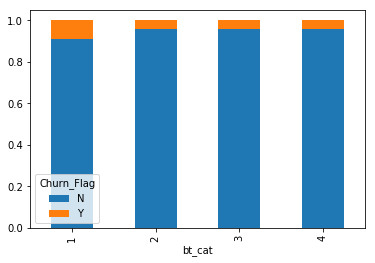

In [20]:
bt = pd.crosstab(df['bt_cat'], df['Churn_Flag'], normalize=0)

bt.plot(kind='bar', stacked=True)

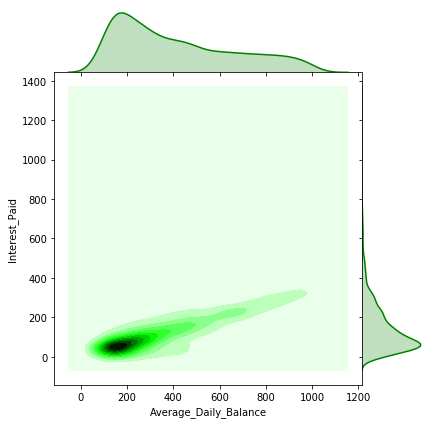

In [21]:
df4 = df.sample(n=10000)
df4 = df4[(df4['Average_Daily_Balance']>100) & (df4['Average_Daily_Balance']<1000)]
sns.jointplot("Average_Daily_Balance", "Interest_Paid", data=df4, kind="kde",space=0,color='g')

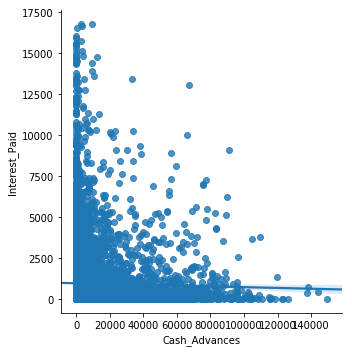

In [26]:
df2 = df.sample(n=10000)
sns.lmplot(x='Cash_Advances', y='Interest_Paid', data=df2)

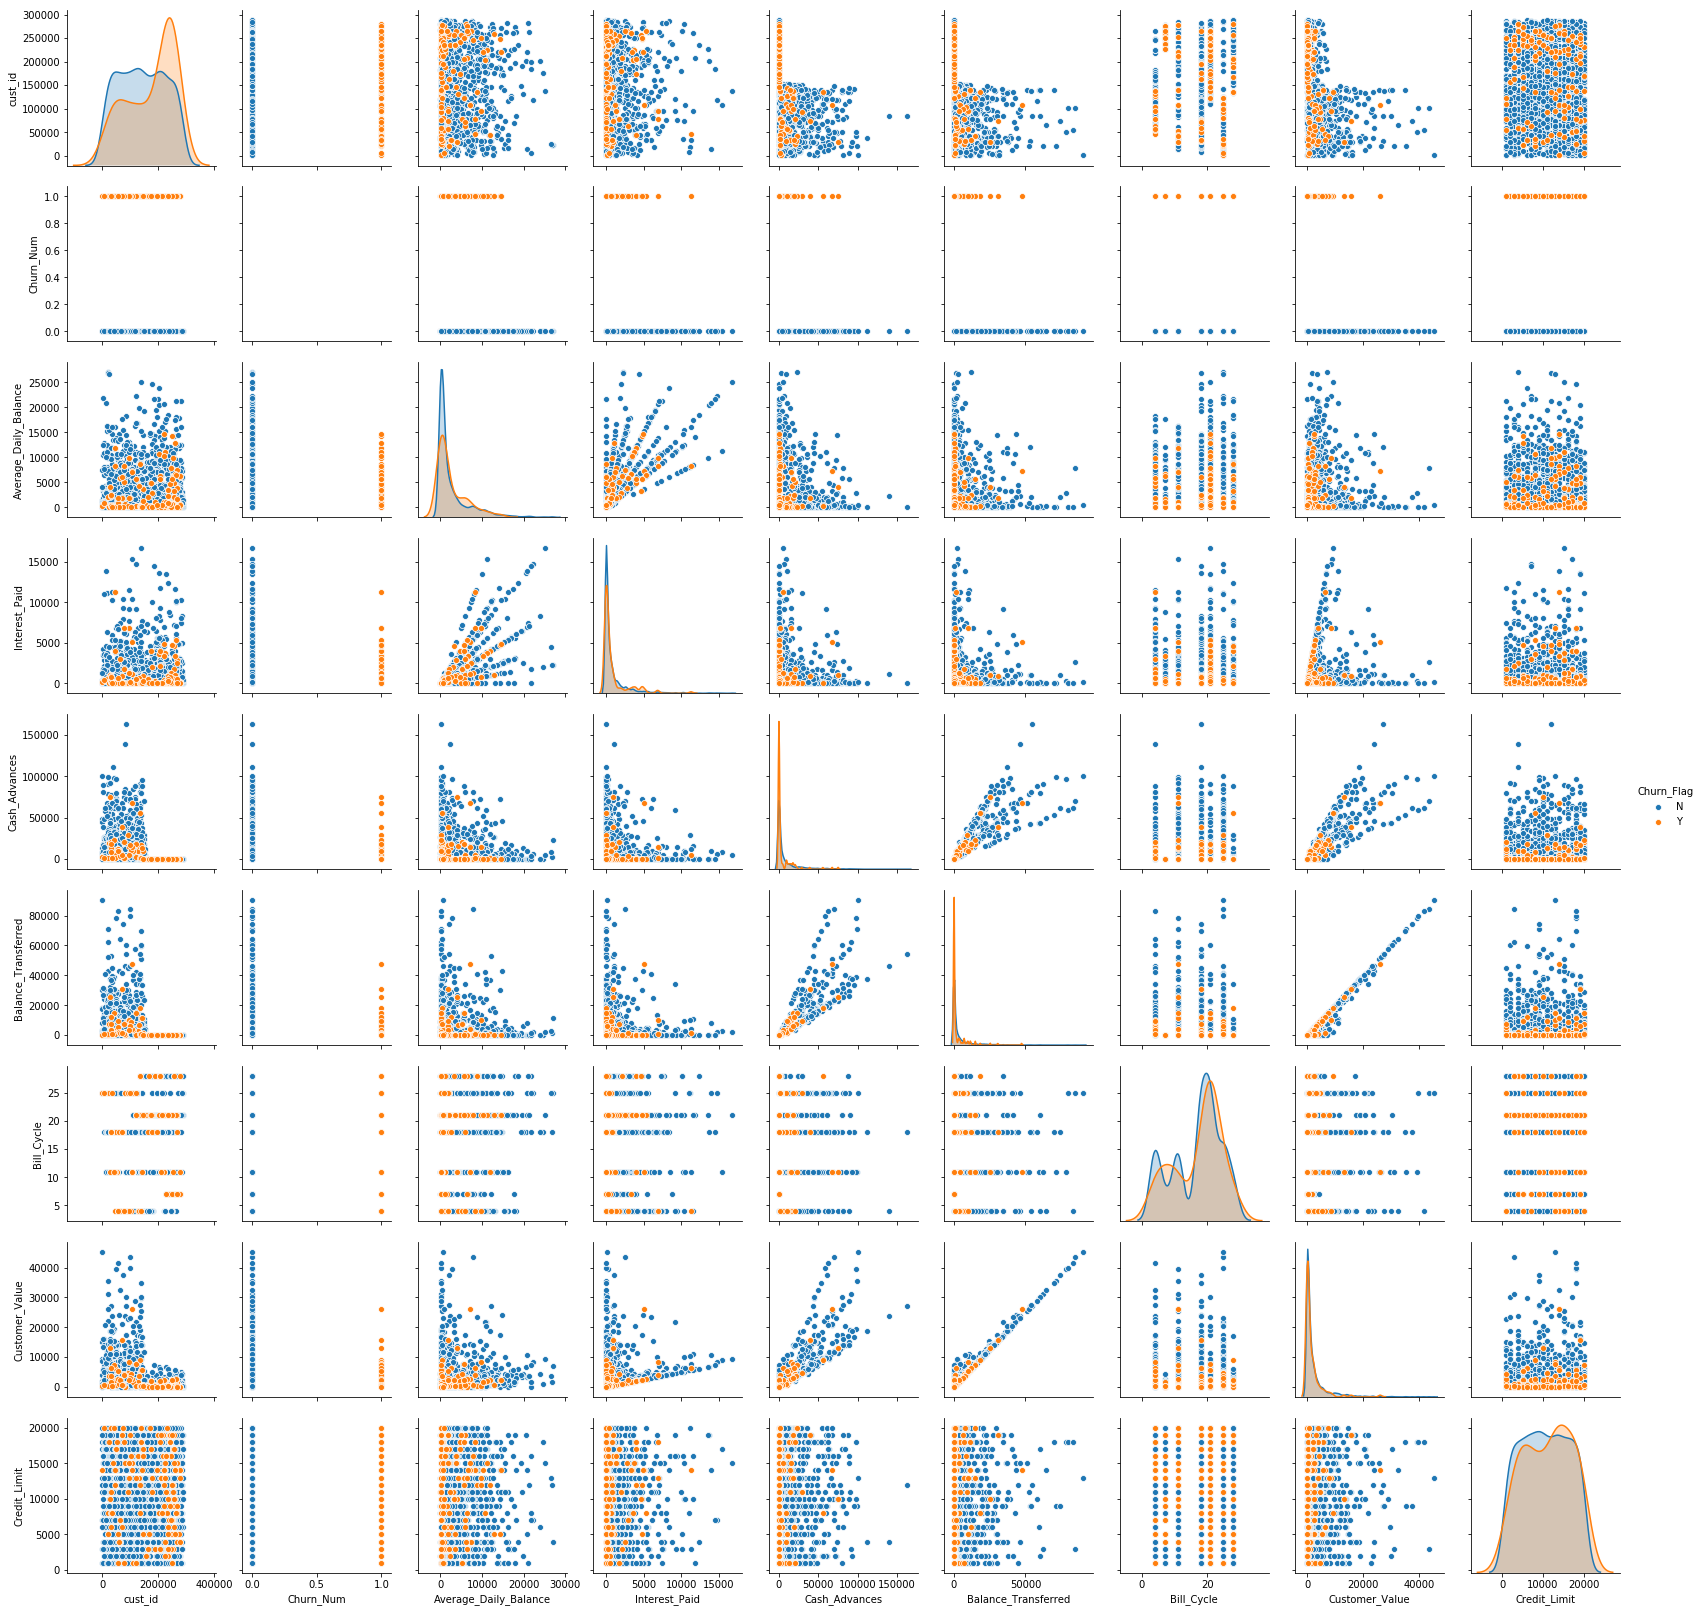

In [20]:
df2 = df.sample(n=2000)
sns.pairplot(df2, hue='Churn_Flag')

### Decision Tree

In [61]:
df_cat = df.select_dtypes(include=['object'])

In [62]:
le = LabelEncoder()

df_cat = df_cat.apply(le.fit_transform)
cat_feature = df_cat.columns

In [63]:
df = df.drop(cat_feature, axis=1)
df = pd.concat([df, df_cat], axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244057 entries, 0 to 244056
Data columns (total 18 columns):
cust_id                   244057 non-null int64
Churn_Num                 244057 non-null int64
Average_Daily_Balance     244057 non-null int64
Interest_Paid             244057 non-null float64
Cash_Advances             244057 non-null int64
Balance_Transferred       244057 non-null float64
Bill_Cycle                244057 non-null int64
Customer_Value            244057 non-null float64
Credit_Limit              244057 non-null int64
adb_cat                   244057 non-null int64
Churn_Flag                244057 non-null int32
Marital_Status            244057 non-null int32
Occupation_Group          244057 non-null int32
Age_of_Account__Months    244057 non-null int32
Age_Group                 244057 non-null int32
LTV_Group                 244057 non-null int32
Customer_Type             244057 non-null int32
Gender                    244057 non-null int32
dtypes: float64(3),

In [70]:
y = df['Churn_Flag']
X = df.drop(['Churn_Num', 'Churn_Flag', 'cust_id', 'Age_of_Account__Months'], axis=1)


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

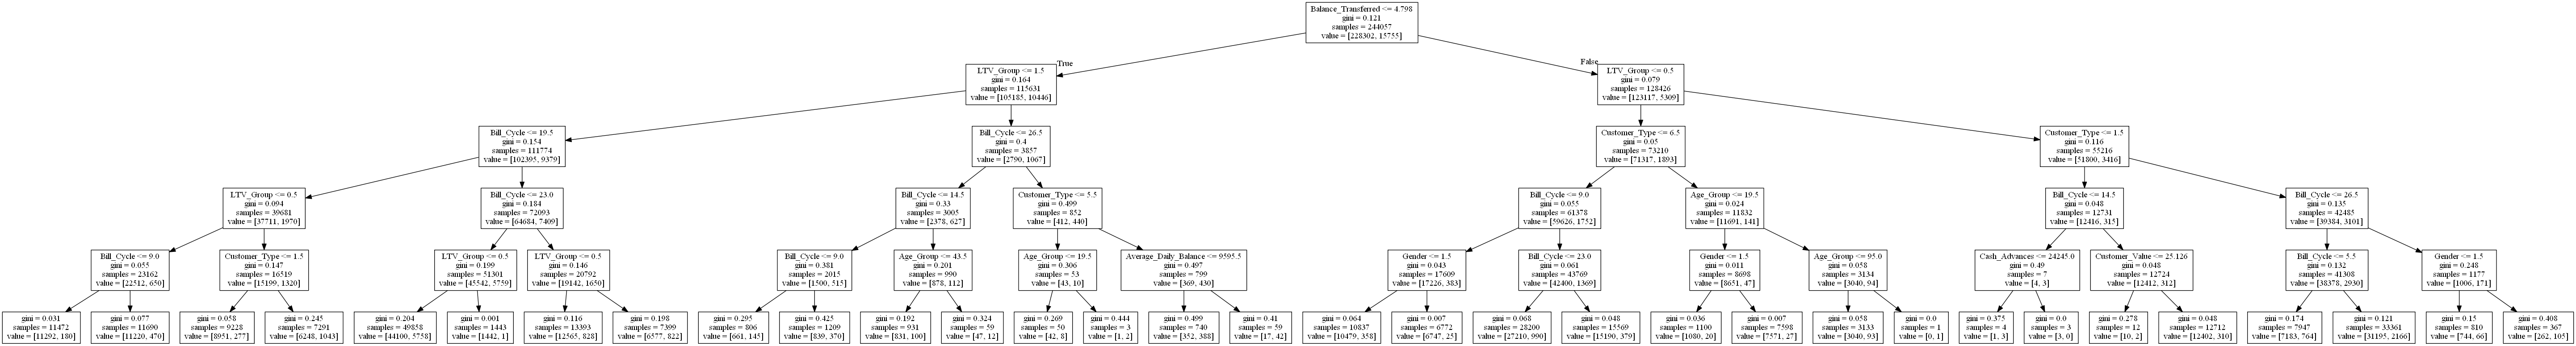

In [71]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

ft = X.columns
dot_data = export_graphviz(dt, feature_names=ft)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
